<a href="https://colab.research.google.com/github/JackyXu866/Project-in-ML-AI/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Documentation
## Task 1
I would like to predict the win rate of League of Legend (a multiplayer competitive video game) depends on the player in-game stats, which could related to their playing style. **Logistic Regression** is the best choice because the outcome (win/lose) is binary classified.

https://www.kaggle.com/datasets/andrewasuter/lol-challenger-soloq-data-jan-krnaeuw?select=KRmatch.csv

# Import

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/KRmatch.csv')

# Task 2: Raw Data Exploration

In [ ]:
df.head()

Unnamed: 0  d_spell  f_spell champion       side           role  assists  \
0           0       14        4    Leona  Side.blue   Lane.utility        6   
1           1       11        4     Udyr   Side.red    Lane.jungle        8   
2           2       14        4   Xerath   Side.red   Lane.utility        2   
3           3       14        4      Zoe   Side.red  Lane.mid_lane        8   
4           4        4       12  Camille   Side.red  Lane.top_lane        8   

   damage_objectives  damage_building  damage_turrets  ...       kda  kills  \
0                  0                0               0  ...  1.333333      2   
1                547            46480             547  ...  6.666667     12   
2                168              444             168  ...  0.285714      0   
3               2492             3082            2492  ...  5.000000      7   
4               6419             7408            6419  ...  4.200000     13   

   level  time_cc  damage_total  damage_taken  total_minions_killed  \
0      9       23         15214          9404                    36   
1     16       32        194463         25782                    23   
2     10       22         34038         14079                    26   
3     14       29         94369         11128                   133   
4     15       25        110580         20404                   141   

   turret_kills  vision_score  result  
0             0            47   False  
1             1            20    True  
2             0            38   False  
3             2            17    True  
4             2            24    True  

[5 rows x 22 columns]

In [ ]:
df.shape

(5697, 22)

In [ ]:
# check if there are any NaN values
df.isna().sum()
# none, so no need to perform any filling the zeros action

Unnamed: 0              0
d_spell                 0
f_spell                 0
champion                0
side                    0
role                    0
assists                 0
damage_objectives       0
damage_building         0
damage_turrets          0
deaths                  0
gold_earned             0
kda                     0
kills                   0
level                   0
time_cc                 0
damage_total            0
damage_taken            0
total_minions_killed    0
turret_kills            0
vision_score            0
result                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697 entries, 0 to 5696
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5697 non-null   int64  
 1   d_spell               5697 non-null   int64  
 2   f_spell               5697 non-null   int64  
 3   champion              5697 non-null   object 
 4   side                  5697 non-null   object 
 5   role                  5697 non-null   object 
 6   assists               5697 non-null   int64  
 7   damage_objectives     5697 non-null   int64  
 8   damage_building       5697 non-null   int64  
 9   damage_turrets        5697 non-null   int64  
 10  deaths                5697 non-null   int64  
 11  gold_earned           5697 non-null   int64  
 12  kda                   5697 non-null   float64
 13  kills                 5697 non-null   int64  
 14  level                 5697 non-null   int64  
 15  time_cc              

In [ ]:
df.describe()

Unnamed: 0      d_spell      f_spell      assists  damage_objectives  \
count  5697.000000  5697.000000  5697.000000  5697.000000        5697.000000   
mean   2848.000000     8.168685     6.651395     7.805512        2563.303493   
std    1644.726573     4.297220     3.957634     5.419037        3230.325379   
min       0.000000     1.000000     1.000000     0.000000           0.000000   
25%    1424.000000     4.000000     4.000000     4.000000         339.000000   
50%    2848.000000     7.000000     4.000000     7.000000        1498.000000   
75%    4272.000000    12.000000    11.000000    11.000000        3679.000000   
max    5696.000000    21.000000    21.000000    39.000000       50654.000000   

       damage_building  damage_turrets       deaths   gold_earned  \
count      5697.000000     5697.000000  5697.000000   5697.000000   
mean       9085.031596     2563.303493     5.479200  10342.235212   
std       10276.550852     3230.325379     2.954292   3500.329873   
min           0.000000        0.000000     0.000000   2900.000000   
25%        1546.000000      339.000000     3.000000   7748.000000   
50%        5109.000000     1498.000000     5.000000   9961.000000   
75%       13104.000000     3679.000000     7.000000  12549.000000   
max       68640.000000    50654.000000    16.000000  28541.000000   

               kda        kills        level      time_cc   damage_total  \
count  5697.000000  5697.000000  5697.000000  5697.000000    5697.000000   
mean      3.733699     5.423732    13.287520    17.957170  107735.695103   
std       3.988976     4.183827     2.458827    14.474076   66545.267335   
min       0.000000     0.000000     6.000000     0.000000    3597.000000   
25%       1.285714     2.000000    12.000000     8.000000   58818.000000   
50%       2.333333     4.000000    13.000000    15.000000  104732.000000   
75%       4.600000     8.000000    15.000000    24.000000  148123.000000   
max      33.000000    24.000000    18.000000   280.000000  541303.000000   

       damage_taken  total_minions_killed  turret_kills  vision_score  
count   5697.000000           5697.000000   5697.000000   5697.000000  
mean   19500.235914            116.970686      0.981745     30.043181  
std     8997.141642             80.843734      1.276964     21.654914  
min     1736.000000              1.000000      0.000000      1.000000  
25%    13101.000000             33.000000      0.000000     16.000000  
50%    18091.000000            130.000000      1.000000     24.000000  
75%    24148.000000            182.000000      2.000000     36.000000  
max    83072.000000            472.000000      8.000000    175.000000

In [ ]:
df.describe(include=['O'])

champion      side          role
count      5697      5697          5697
unique      148         2             5
top        Jhin  Side.red  Lane.utility
freq        218      2880          1153

In [ ]:
# The overall result is pretty balance
df.result.value_counts(normalize=True)

False    0.503949
True     0.496051
Name: result, dtype: float64

# Pairplot Raw

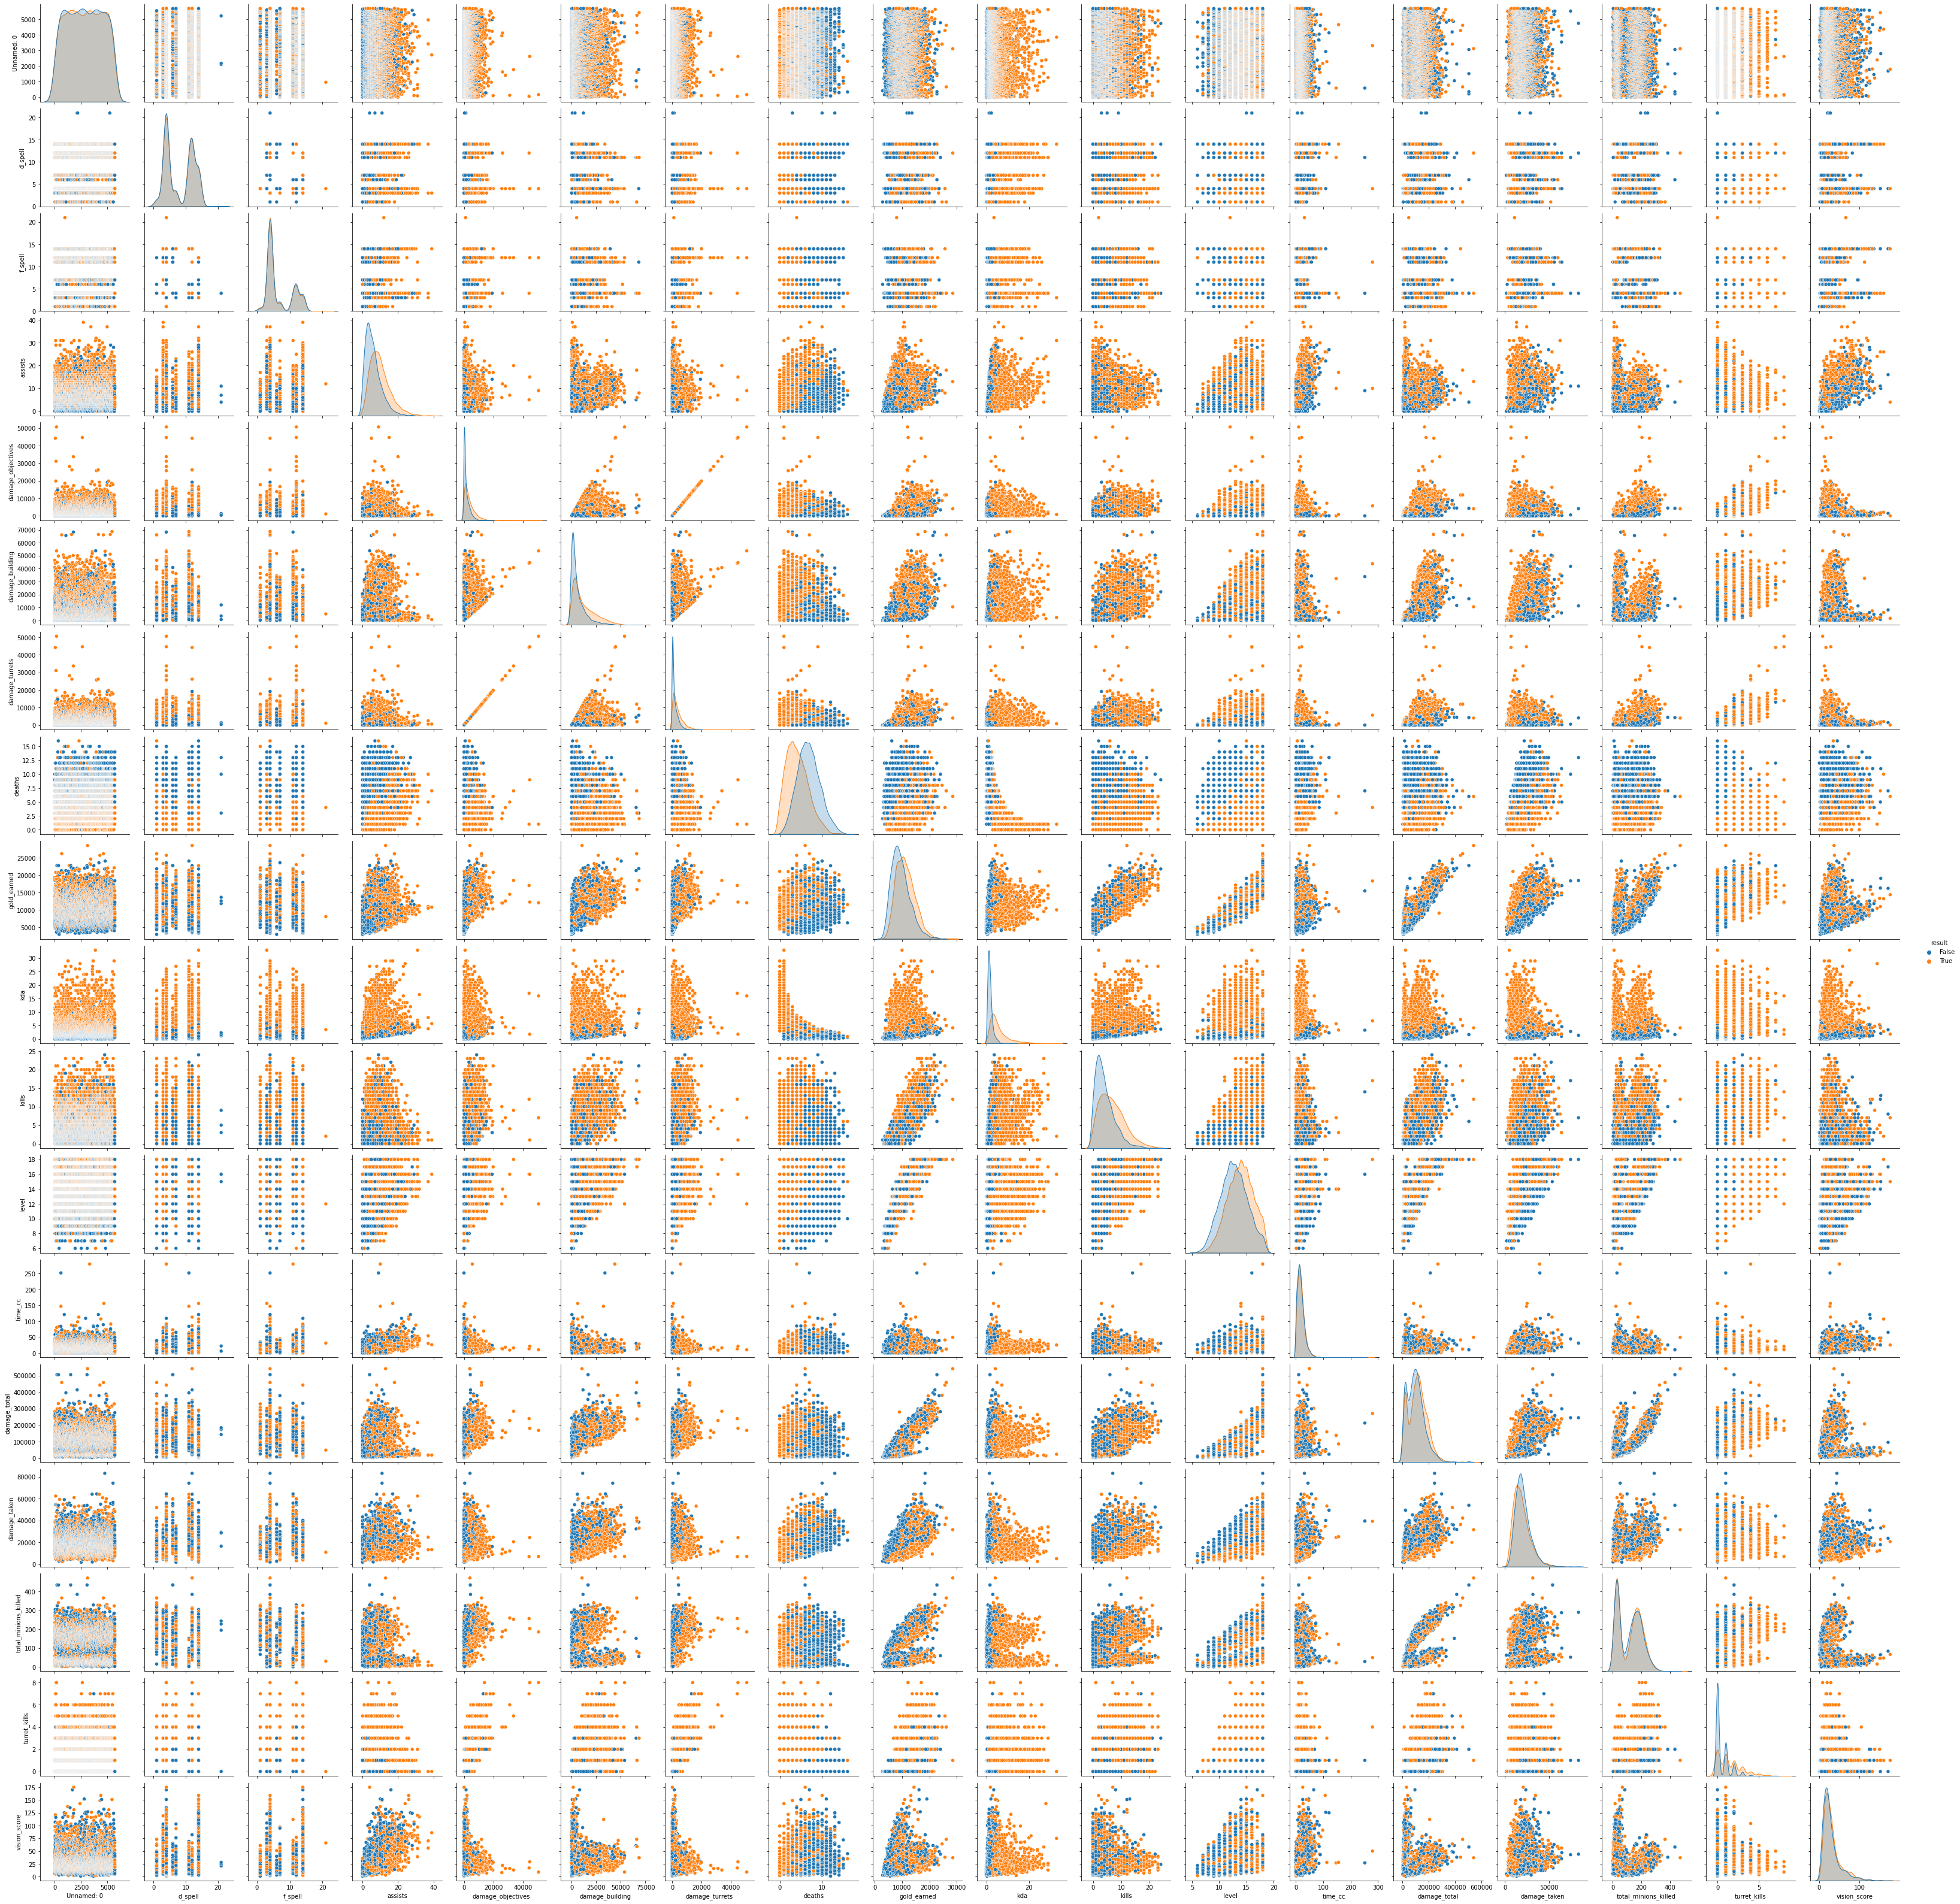

In [ ]:
sns.pairplot(df, hue='result')

# Basic Cleaning

In [ ]:
df.corr()['result']["d_spell"]

0.01113599778527804

In [ ]:
df.corr()['result']["f_spell"]

-0.01604364371758429

In [ ]:
# was think of dropping "d_spell" and "f_spell"
# but it turns out it has some correlation to result

# drop the id, a random number identify the game
dfc = df.drop(['Unnamed: 0'], axis=1)

# Process Non-Int Data

## Visualize Side vs. Win
check if sides effect winning

In [ ]:
df.side.value_counts(normalize=True)

Side.red     0.505529
Side.blue    0.494471
Name: side, dtype: float64

Text(0.5, 1.0, 'Win rate on blue side')

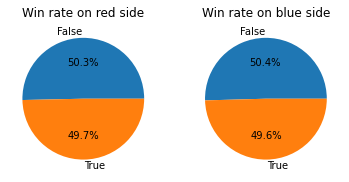

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(x=df.loc[df.side=="Side.red"].result.value_counts(),
        labels=df.loc[df.side=="Side.red"].result.value_counts().index,
        autopct='%1.1f%%')
ax1.set_title("Win rate on red side")

ax2.pie(x=df.loc[df.side=="Side.blue"].result.value_counts(),
        labels=df.loc[df.side=="Side.blue"].result.value_counts().index,
        autopct='%1.1f%%')
ax2.set_title("Win rate on blue side")


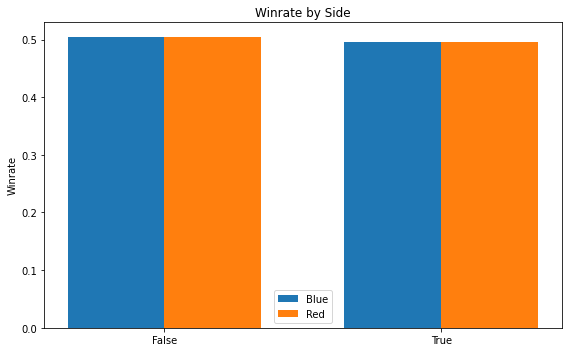

In [ ]:
# useful for comparing things between different groups or to track changes over time
labels = df.result.value_counts().index
blue_side = df.loc[df.side=="Side.red"].result.value_counts(normalize=True)
red_side = df.loc[df.side=="Side.blue"].result.value_counts(normalize=True)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, blue_side, width, label='Blue')
rects2 = ax.bar(x + width/2, red_side, width, label='Red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Winrate')
ax.set_title('Winrate by Side')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

In [ ]:
# side has too less of corrolation, drop
dfc = dfc.drop(['side'], axis=1)

## Role Data
I think we should consider the role separately, because player with different
role has different responsibility, thus having the different stats. However, 
the dataset here is not large enough to consider them separately, so I will just
leave them here.

In [ ]:
df.role.value_counts()

Lane.utility     1153
Lane.jungle      1148
Lane.top_lane    1141
Lane.mid_lane    1128
Lane.bot_lane    1127
Name: role, dtype: int64

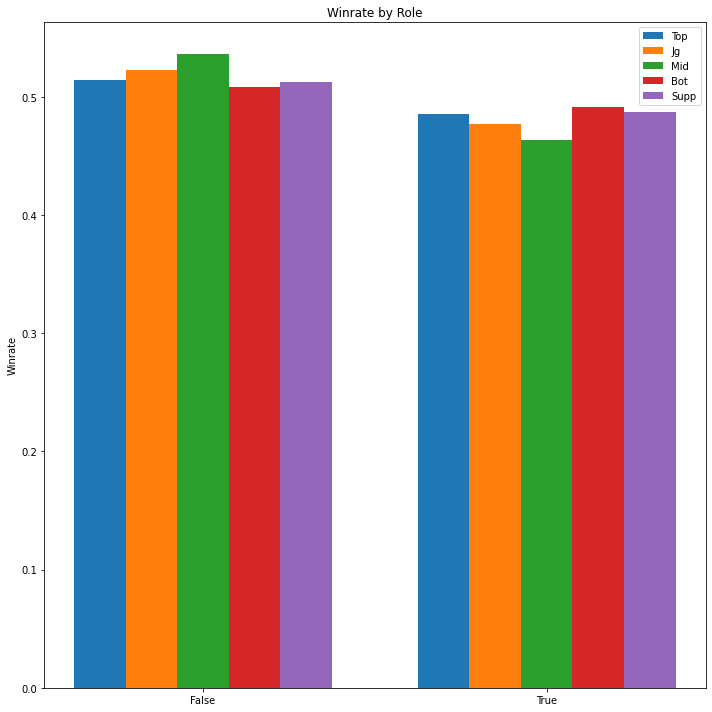

In [ ]:
# useful for comparing things between different groups or to track changes over time
labels = df.result.value_counts().index
top = df.loc[df.role=="Lane.top_lane"].result.value_counts(normalize=True)
jg = df.loc[df.role=="Lane.jungle"].result.value_counts(normalize=True)
mid = df.loc[df.role=="Lane.mid_lane"].result.value_counts(normalize=True)
bot = df.loc[df.role=="Lane.bot_lane"].result.value_counts(normalize=True)
sup = df.loc[df.role=="Lane.utility"].result.value_counts(normalize=True)

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x-2*width, top, width, label='Top')
rects2 = ax.bar(x-width, jg, width, label='Jg')
rects3 = ax.bar(x, mid, width, label='Mid')
rects4 = ax.bar(x+width, bot, width, label='Bot')
rects5 = ax.bar(x+2*width, sup, width, label='Supp')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Winrate')
ax.set_title('Winrate by Role')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

In [ ]:
dfc.groupby("role").mean()

d_spell   f_spell    assists  damage_objectives  \
role                                                              
Lane.bot_lane  4.587400  4.732032   6.699201        4643.099379   
Lane.jungle    8.552265  6.638502   7.919861        1308.452962   
Lane.mid_lane  9.718972  6.674645   6.159574        2455.963652   
Lane.top_lane  8.992112  7.535495   5.480280        3894.143734   
Lane.utility   8.955768  7.642671  12.684302         567.838682   

               damage_building  damage_turrets    deaths   gold_earned  \
role                                                                     
Lane.bot_lane      9570.840284     4643.099379  5.566105  11565.084295   
Lane.jungle       21092.932056     1308.452962  4.987805  11044.596690   
Lane.mid_lane      5111.903369     2455.963652  5.257092  10660.940603   
Lane.top_lane      8261.280456     3894.143734  5.605609  10937.973707   
Lane.utility       1356.508239      567.838682  5.975716   7546.312229   

                    kda     kills      level    time_cc   damage_total  \
role                                                                     
Lane.bot_lane  3.725302  6.479148  13.208518  11.892635  133478.365572   
Lane.jungle    4.866899  7.467770  13.560976  15.386760  139261.151568   
Lane.mid_lane  3.516923  5.609929  13.909574  18.755319  117638.195922   
Lane.top_lane  2.874099  5.271691  14.240140  14.236635  126257.141104   
Lane.utility   3.676353  2.325239  11.541197  29.345186   23168.301821   

               damage_taken  total_minions_killed  turret_kills  vision_score  \
role                                                                            
Lane.bot_lane  15887.093168            184.227152      1.526176     21.820763   
Lane.jungle    25644.367596             32.234321      0.906794     28.000871   
Lane.mid_lane  18223.788121            170.958333      0.914894     20.518617   
Lane.top_lane  22402.768624            172.053462      1.395267     19.967572   
Lane.utility   15290.862099             28.273200      0.180399     59.402428   

                 result  
role                     
Lane.bot_lane  0.491571  
Lane.jungle    0.522648  
Lane.mid_lane  0.463652  
Lane.top_lane  0.514461  
Lane.utility   0.487424

In [ ]:
# encode different roles to int
dfc.role = dfc.role.map({'Lane.top_lane': 0, 'Lane.jungle': 1, 'Lane.mid_lane': 2, 'Lane.bot_lane': 3, 'Lane.utility': 4})

## Champion Data

In [ ]:
df.champion.value_counts()

Jhin       218
LeeSin     214
Graves     205
Yone       151
Caitlyn    143
          ... 
Gnar         1
Fizz         1
Brand        1
Ivern        1
Rammus       1
Name: champion, Length: 148, dtype: int64

In [ ]:
# too much varieties of champions with less data on each, drop
dfc = dfc.drop(["champion"], axis=1)

# Finalized Data

In [ ]:
dfc.head()

d_spell  f_spell  role  assists  damage_objectives  damage_building  \
0       14        4     4        6                  0                0   
1       11        4     1        8                547            46480   
2       14        4     4        2                168              444   
3       14        4     2        8               2492             3082   
4        4       12     0        8               6419             7408   

   damage_turrets  deaths  gold_earned       kda  kills  level  time_cc  \
0               0       6         6043  1.333333      2      9       23   
1             547       3        12919  6.666667     12     16       32   
2             168       7         5641  0.285714      0     10       22   
3            2492       3        10688  5.000000      7     14       29   
4            6419       5        12368  4.200000     13     15       25   

   damage_total  damage_taken  total_minions_killed  turret_kills  \
0         15214          9404                    36             0   
1        194463         25782                    23             1   
2         34038         14079                    26             0   
3         94369         11128                   133             2   
4        110580         20404                   141             2   

   vision_score  result  
0            47   False  
1            20    True  
2            38   False  
3            17    True  
4            24    True

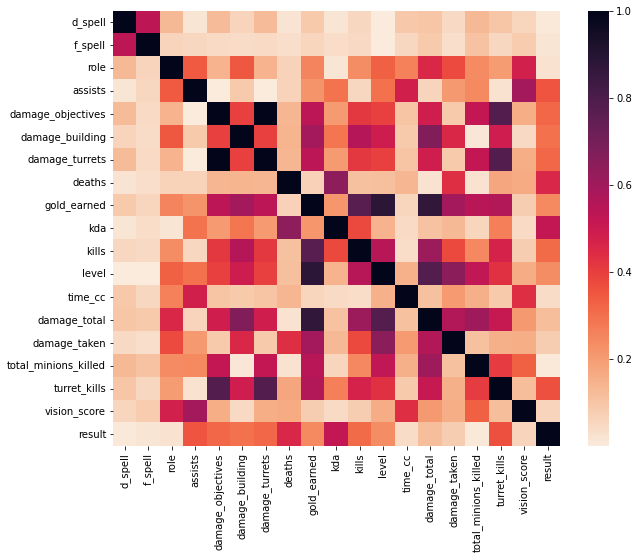

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfc.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

In [ ]:
# feature correlation with target variable
dfc.corr()['result'].sort_values(ascending=False)

result                  1.000000
kda                     0.520986
turret_kills            0.364473
assists                 0.357556
damage_objectives       0.317054
damage_turrets          0.317054
kills                   0.311637
damage_building         0.297848
gold_earned             0.245974
level                   0.238246
damage_total            0.117650
vision_score            0.061611
time_cc                 0.039468
d_spell                 0.011136
total_minions_killed    0.009237
f_spell                -0.016044
role                   -0.024141
damage_taken           -0.079208
deaths                 -0.457224
Name: result, dtype: float64

# Partition

In [ ]:
# independent variables
X = dfc.drop(['result'], axis=1)
# dependent/target variable
y = dfc.result

# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# scale the data between 0 and 1
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3987, 18)
(3987,)


In [ ]:
# check if normalizer work fine
for col in range(X_train.shape[1]):
  print(X_train[:, col].max())
  print(X_train[:, col].min())
  print()

0.002414209346439041
2.184207307483968e-06

0.0021250758955676987
3.0432969862229946e-06

0.0006897740989825832
0.0

0.00220962628494572
0.0

0.2073344668369608
0.0

0.4096583168839834
0.0

0.2073344668369608
0.0

0.0007909827961241843
0.0

0.8506310039555471
0.032349979033084716

0.0016602102933038186
0.0

0.0005319148936170213
0.0

0.0015852885225110971
3.325309484706347e-05

0.0036051363065581076
0.0

1.0
0.3797375779737578

1.0
0.02882211799720766

0.004148557882259977
1.8324751241501897e-05

0.0002871500358937545
0.0

0.007879751026354125
2.5265285497726124e-05



In [ ]:
y_train = y_train.to_numpy()

AttributeError: ignored

In [ ]:
y_train.shape

(3987,)

# Task 3: Logistic Regression


In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
def evaluate_gradient(X, Y, w, b):
  m = len(X)
  # A = sigmoid(X.dot(w) + b)
  A = sigmoid(np.dot(w.T, X.T)+b)
  # cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*(np.log(1-A)))
  cost = -1/m*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
  # dw = np.dot(X.T, A-Y)/m
  dw = (A-Y).dot(X)/m
  db = np.sum(A-Y)/m
  return dw, db, cost
  

In [ ]:
# gradient_descent: 0 - Batch, 1 - Mini-Batch, 2 - SGD
# batch_size: only apply when chooing Mini-Batch
# debug: 0 - off, 1 - on, show the plot for cost
def logistic_regression(x, Y, learning_rate=0.1, iter=1000, gradient_descent=0, batch_size=256, debug=0):
  # initialize
  w = np.zeros(x.shape[1])
  b = 0
  cost = 1
  print_it = iter/10
  if debug:
    cost_l = np.zeros(iter)
  for i in range(iter):
    # batch
    if gradient_descent == 0:
      dw, db, cost = evaluate_gradient(x, Y, w, b)
      w = w - (learning_rate*dw)
      b = b - (learning_rate*db) 
      if debug:
        cost_l[i] = cost
    # mini-batch
    elif gradient_descent == 1:
      sample = np.random.choice(len(x), len(x), replace=False)
      batch_num = int(len(x)/batch_size)
      for bat in range(batch_num):
        ind = sample[batch_size*bat:batch_size*(bat+1)]
        dw, db, cost = evaluate_gradient(x[ind], Y[ind], w, b)
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db) 
      if debug:
        cost_l[i] = cost
    # SGD
    elif gradient_descent == 2:
      sample = np.random.choice(len(x), 1, replace=False)
      dw, db, cost = evaluate_gradient(x[sample], Y[sample], w, b)
      w = w - (learning_rate*dw)
      b = b - (learning_rate*db) 
      if debug:
        cost_l[i] = cost

    if i%print_it == 0:
      print("Cost for iteration", i, "is", cost)
  print("Cost for iteration", iter, "is", cost)

  if debug:
    plt.plot(np.arange(0, iter), cost_l)
    plt.show()
  
  return w, b


In [ ]:
def predict(X, w, b):
  A = sigmoid(X.dot(w) + b)
  Y = np.where(A>0.5, 1, 0)
  return Y

In [ ]:
def get_score(y_test, y_pred):  
  # overall acuracy of the model
  print(accuracy_score(y_test, y_pred))
  # f1 score of the model
  print(f1_score(y_test, y_pred))

# Comparison Between All Gradient Descent

All of data is tested based on the same time frame (15 sec)

I implemented all three of the gradient descents, including *Batch*, 
*mini-Batch* and *stochastic*. The ultimate quality/accuracy of the other
two method is better than the vanilla(batch) one. However, the cost 
for batch is a lot more smoother, with SGD as the least smooth one.
So for the other two, there is a chance of getting the worse result 
at the end.

For mini-batch, I have also tested the relationship between the result
and the batch size. It turned out to be the same in the same time 
frame.

Cost for iteration 0 is 0.6931471805599453
Cost for iteration 2000 is 0.6847446303223911
Cost for iteration 4000 is 0.6785151679752482
Cost for iteration 6000 is 0.673441381803109
Cost for iteration 8000 is 0.6690176268603428
Cost for iteration 10000 is 0.6649897985666573
Cost for iteration 12000 is 0.661227733827362
Cost for iteration 14000 is 0.6576629010234675
Cost for iteration 16000 is 0.6542577868329584
Cost for iteration 18000 is 0.6509906869444498
Cost for iteration 20000 is 0.6478496050061203


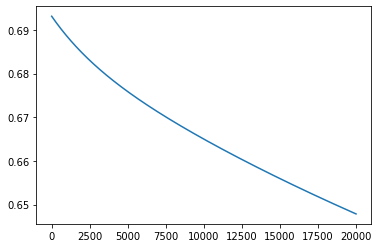

In [ ]:
# batch GD
w_batch, b_batch = logistic_regression(X_train, y_train, 0.01, 20000, 0, debug=1)

Cost for iteration 0 is 0.6931513424646818
Cost for iteration 1000 is 0.6673301413534456
Cost for iteration 2000 is 0.6457999172116888
Cost for iteration 3000 is 0.596156646461953
Cost for iteration 4000 is 0.5779114877337159
Cost for iteration 5000 is 0.5890335942063516
Cost for iteration 6000 is 0.5736302406367089
Cost for iteration 7000 is 0.5781356590013723
Cost for iteration 8000 is 0.5773340528438344
Cost for iteration 9000 is 0.5415889113008316
Cost for iteration 10000 is 0.5775798712787918


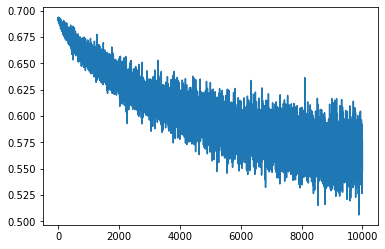

In [ ]:
# mini-batch GD
w_mini, b_mini = logistic_regression(X_train, y_train, 0.01, 10000, 1, 256, debug=1)

Cost for iteration 0 is 0.6927068778161071
Cost for iteration 250 is 0.6485603865905591
Cost for iteration 500 is 0.6312425235988696
Cost for iteration 750 is 0.609460806822866
Cost for iteration 1000 is 0.5866343466999381
Cost for iteration 1250 is 0.4939199551486349
Cost for iteration 1500 is 0.535046059199143
Cost for iteration 1750 is 0.5654261364351907
Cost for iteration 2000 is 0.5792081388302837
Cost for iteration 2250 is 0.5736687694105213
Cost for iteration 2500 is 0.565861154056844


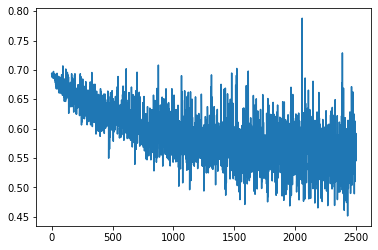

In [ ]:
w_mini2, b_mini2 = logistic_regression(X_train, y_train, 0.01, 2500, 1, 50, debug=1)

In [ ]:
# test case of less batch_size and lower iteration
# keep iter/batch_size the same
y_pred_mini2 = predict(X_test, w_mini2, b_mini2)
get_score(y_test, y_pred_mini2)

0.7432748538011696
0.7394658753709199


In [ ]:
# SGD
w_sgd1, b_sgd1 = logistic_regression(X_train, y_train, 0.01, 1, 2)

(1, 18) (1,)
Cost for iteration 0 is 0.6931471805599453
Cost for iteration 1 is 0.6931471805599453


Cost for iteration 0 is 0.6931471805599453
Cost for iteration 10000 is 0.6002245482586502
Cost for iteration 20000 is 0.4733064619695916
Cost for iteration 30000 is 0.6036301296806192
Cost for iteration 40000 is 0.685462217494748
Cost for iteration 50000 is 0.6470234598830834
Cost for iteration 60000 is 0.3161905795126228
Cost for iteration 70000 is 0.49384863397046375
Cost for iteration 80000 is 0.5852994568660916
Cost for iteration 90000 is 0.5455097894933147
Cost for iteration 100000 is 0.49388958846675723


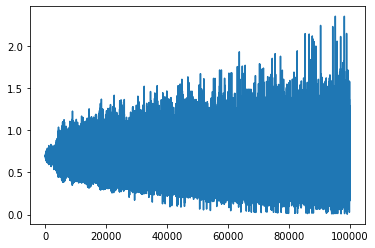

In [ ]:
# SGD
w_sgd, b_sgd = logistic_regression(X_train, y_train, 0.01, 100000, 2, debug=1)

In [ ]:
y_pred_batch = predict(X_test, w_batch, b_batch)

In [ ]:
y_pred_mini = predict(X_test, w_mini, b_mini)

In [ ]:
y_pred_sgd = predict(X_test, w_sgd, b_sgd)

In [ ]:
get_score(y_test, y_pred_batch)
print()
get_score(y_test, y_pred_mini)
print()
get_score(y_test, y_pred_sgd)

0.7035087719298245
0.7178631051752921

0.7432748538011696
0.7400828892835997

0.743859649122807
0.7259073842302879


# Built-in
Using built-in package for Logistic Regression to see if I did correctly

In [ ]:
# define the model
lrg = LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
# train the model
lrg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
# predict the result using the trained model
y_pred_lrg = lrg.predict(X_test)

In [ ]:
# overall acuracy of the model
accuracy_score(y_test, y_pred_lrg)

0.7298245614035088

In [ ]:
# f1 score of the model
f1_score(y_test, y_pred_lrg)

0.7169117647058824

# Task 4: Optimizer
I implemented the *Adam* and *Adagrad* optimizer on the vanilla batch
gradient descent.

Compare to the vanilla one, the result is much accurate with the same time frame
used.

For Adam, it requires a lot of argument, including β_1, β_2. I am just using the
default value for those two provided by TensorFlow, 0.9 and 0.999. The cost 
reaches limit (still decrease but very insignificant) in just 5000 iteration.
The drop rate and efficiency of this optimizer is fast. This optimizer introduced variables that could keep track of the past gradient and optimize the learning rate based on the past.

For Adagrad, it needs to store the sum of gradient^2 for every iteration and 
derivative of weight is divide by that. So the more change to weight previously, the less it is going to apply to weight. With that, it cause a soft curve that start step and become slower and slower. One of advantage that I can
imagine for that is the rarely appeared feature could also have some impact to the algorithm instead being taken overed by those appeared frequently.

For this dataset, I think Adam is the better approach, because it is the most efficient one and there are no data missing, so AdaGrad is not needed.

In [ ]:
# Adam with batch gd
def adamOpt(x, y, iter=1000, learning_rate=0.001, beta1=0.9, beta2=0.999, debug=0):
  w = np.zeros(x.shape[1])
  b = 0
  print_it = iter/10

  m = 0
  v = 0

  if debug:
    cost_l = np.zeros(iter)
  
  for i in range(iter):
    dw, db, cost = evaluate_gradient(x, y, w, b)

    m = beta1*m + (1-beta1)*dw
    v = beta2*v + (1-beta2)*(np.dot(dw, dw))
    mhat = m/(1-beta1**(i+1))
    vhat = v/(1-beta2**(i+1))

    w = w - learning_rate*mhat/np.sqrt(vhat)
    b = b - (learning_rate*db) 
    
    if debug:
      cost_l[i] = cost
    
    if i%print_it == 0:
      print("Cost for iteration", i, "is", cost)
  print("Cost for iteration", iter, "is", cost)

  if debug:
    plt.plot(np.arange(0, iter), cost_l)
    plt.show()

  return w, b


Cost for iteration 0 is 0.6931471805599453
Cost for iteration 2000 is 0.5548892735626028
Cost for iteration 4000 is 0.528515493404523
Cost for iteration 6000 is 0.5230724030722845
Cost for iteration 8000 is 0.5224666023339731
Cost for iteration 10000 is 0.5224364912238784
Cost for iteration 12000 is 0.5223686229654603
Cost for iteration 14000 is 0.5222297634894212
Cost for iteration 16000 is 0.5220829171766512
Cost for iteration 18000 is 0.5219361889656918
Cost for iteration 20000 is 0.5217901350634414


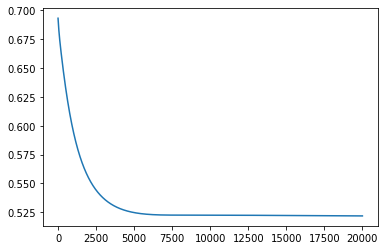

In [ ]:
w_adam, b_adam = adamOpt(X_train, y_train, 20000, 0.01, debug=1)

In [ ]:
y_pred_adam = predict(X_test, w_adam, b_adam)
get_score(y_test, y_pred_adam)

0.7532163742690059
0.7395061728395061


In [ ]:
# Adagrad with batch gd
def adagrad(x, y, iter=1000, learning_rate=0.001, debug=0):
  w = np.zeros(x.shape[1])
  b = 0
  print_it = iter/10


  if debug:
    cost_l = np.zeros(iter)
  
  sq_sum = np.zeros(x.shape[1])
  for i in range(iter):
    dw, db, cost = evaluate_gradient(x, y, w, b)

    sq_sum += dw**2

    w = w - learning_rate*dw/np.sqrt(sq_sum)
    b = b - (learning_rate*db) 
    
    if debug:
      cost_l[i] = cost
    
    if i%print_it == 0:
      print("Cost for iteration", i, "is", cost)
  print("Cost for iteration", iter, "is", cost)

  if debug:
    plt.plot(np.arange(0, iter), cost_l)
    plt.show()

  return w, b

Cost for iteration 0 is 0.6931471805599453
Cost for iteration 2000 is 0.6622868342010007
Cost for iteration 4000 is 0.6515262762505465
Cost for iteration 6000 is 0.6439909385452349
Cost for iteration 8000 is 0.6380688842290739
Cost for iteration 10000 is 0.6331465105469845
Cost for iteration 12000 is 0.6289145462482317
Cost for iteration 14000 is 0.6251924073479198
Cost for iteration 16000 is 0.6218644005710907
Cost for iteration 18000 is 0.6188514681663391
Cost for iteration 20000 is 0.6160982681556432


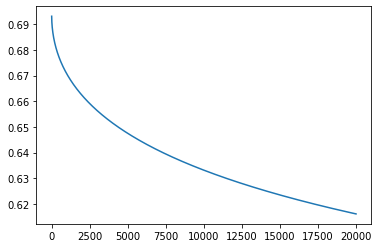

In [ ]:
w_adagrad, b_adagrad = adagrad(X_train, y_train, 20000, 0.01, debug=1)

In [ ]:
y_pred_adagrad = predict(X_test, w_adagrad, b_adagrad)
get_score(y_test, y_pred_adagrad)

0.7362573099415205
0.7361029842012873
